In [2]:
import matplotlib.pyplot as plt
import skimage.io as skio
import skimage
import numpy as np
import skimage.morphology as morpho
import cv2
from scipy.signal import convolve2d
from sckimage.util import crop
import numpy.fft as fft

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
imgs = []
for i in range(1, 10):
  imgs.append(skio.imread("dices" + str(i) + ".jpg"))

In [27]:
def dice_mask(img):
  imhsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  low_red = np.array([122,50,50])
  high_red = np.array([136,255,255])
  mask = cv2.inRange(imhsv, low_red, high_red)
  return mask

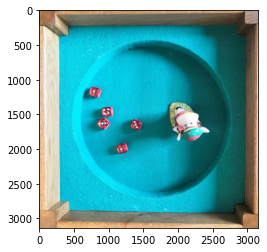

In [5]:
img = skio.imread("dices2.jpg")
imhsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
rows,cols,channels=imhsv.shape
plt.imshow(img)

In [1]:
imred   = img[:,:,0]
imgreen = img[:,:,1]
imblue  = img[:,:,2]


low_red2=np.array([122,100,100])
high_red2=np.array([135,255,255])
mask=cv2.inRange(imhsv,low_red2,high_red2)


plt.imshow(mask, cmap='gray')
plt.show()
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

#we display the images
axes[0, 0].imshow(mask,cmap='gray')
axes[0,0].set_title('Masked image')
axes[0, 1].imshow(imred, cmap="gray")
axes[0,1].set_title('red channel')
axes[1, 0].imshow(imgreen, cmap="gray")
axes[1,0].set_title('green channel')
axes[1, 1].imshow(imblue, cmap="gray")
axes[1,1].set_title('blue channel')
fig.tight_layout()

NameError: ignored

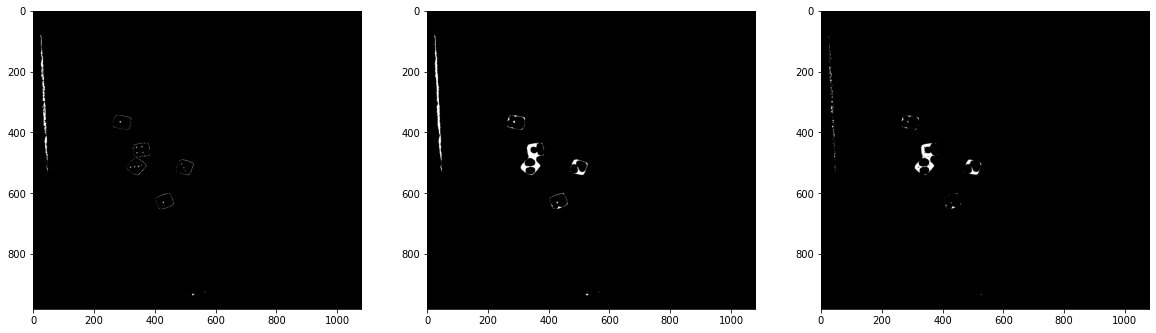

In [50]:
strell = morpho.disk(10)
img_filtered = morpho.closing(mask, strell)

fig, axs = plt.subplots(1, 3, figsize=(20,20))
axs[0].imshow(mask, cmap='gray')
axs[1].imshow(img_filtered, cmap='gray')
axs[2].imshow(mask - img_filtered, cmap='gray')
plt.show()

image 1
area: 1914 dims: 46 56 ratio: 0.8885793871866295
area: 1703 dims: 45 55 ratio: 0.8105663969538315
area: 1768 dims: 55 62 ratio: 0.8166281755196305
area: 1771 dims: 49 56 ratio: 0.8762988619495299
area: 1840 dims: 50 57 ratio: 0.8833413346135381


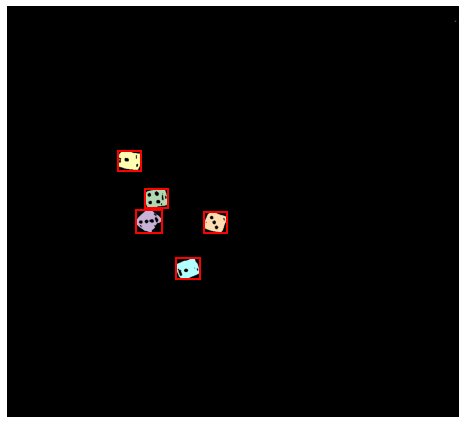

image 2
area: 17359 dims: 147 166 ratio: 0.879025724123962
area: 15588 dims: 142 161 ratio: 0.7864386257000151
area: 15600 dims: 175 187 ratio: 0.7610869883397571
area: 15439 dims: 157 168 ratio: 0.8163599830795262
area: 17340 dims: 160 167 ratio: 0.886276514183491


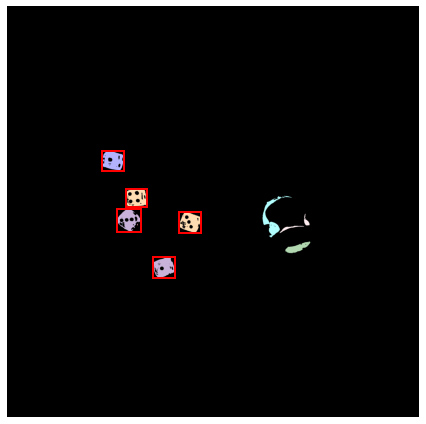

image 3
area: 1667 dims: 51 57 ratio: 0.7492134831460674
area: 1747 dims: 53 60 ratio: 0.7685877694676638
area: 1806 dims: 53 65 ratio: 0.7610619469026548
area: 2060 dims: 58 62 ratio: 0.8754781130471738
area: 1717 dims: 57 62 ratio: 0.7481481481481481


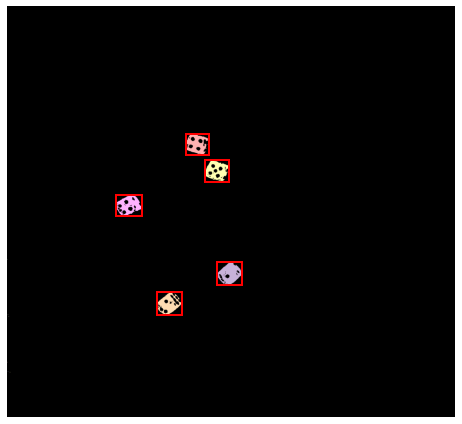

image 4
area: 17176 dims: 170 177 ratio: 0.7334528994790332
area: 16881 dims: 171 189 ratio: 0.7193812324213756
area: 18341 dims: 176 204 ratio: 0.756236341895848
area: 21305 dims: 194 196 ratio: 0.8929918685556207
area: 18072 dims: 188 195 ratio: 0.7729352893374962


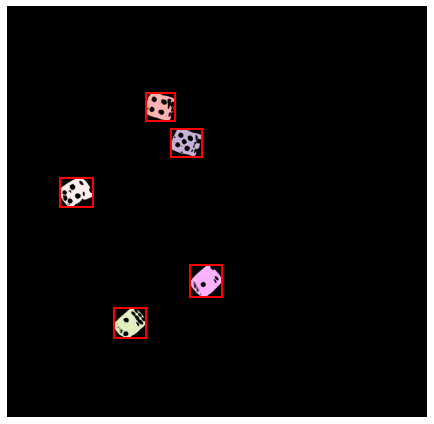

image 5
area: 20639 dims: 190 203 ratio: 0.7839182619264661
area: 16219 dims: 186 189 ratio: 0.6639240247247125
area: 20881 dims: 157 162 ratio: 0.871021565928336
area: 16342 dims: 154 182 ratio: 0.6349366695158909
area: 17271 dims: 191 198 ratio: 0.6569168156403332


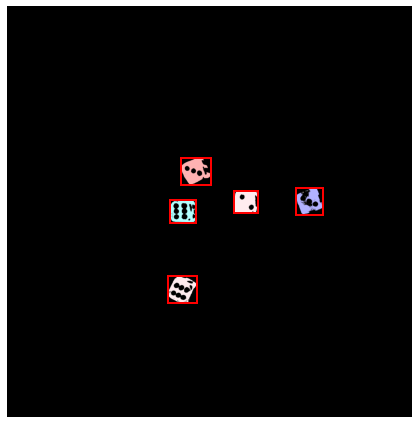

image 6
area: 12324 dims: 170 185 ratio: 0.5923576063446286
area: 21859 dims: 187 193 ratio: 0.9266214497668503
area: 17831 dims: 194 197 ratio: 0.7540810285037638
area: 18797 dims: 165 164 ratio: 0.8350510884051533
area: 15372 dims: 171 172 ratio: 0.7057527202607777


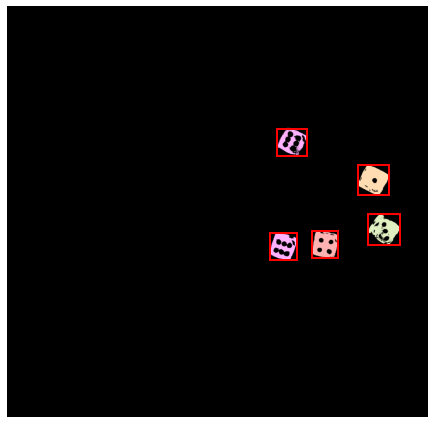

image 7
area: 17041 dims: 213 182 ratio: 0.7123866059111241
area: 21000 dims: 191 189 ratio: 0.7562934418554399
area: 21338 dims: 214 209 ratio: 0.7562107949108693
area: 16343 dims: 213 200 ratio: 0.5264802525610464
area: 19143 dims: 198 168 ratio: 0.6820951362907536


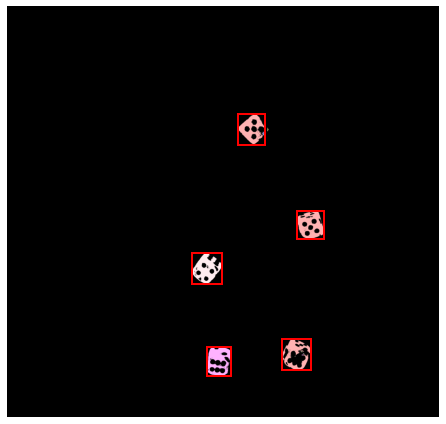

image 8
area: 18100 dims: 180 189 ratio: 0.795849272303566
area: 18746 dims: 179 174 ratio: 0.8452139411154695
area: 18620 dims: 150 150 ratio: 0.8743836581357126
area: 14595 dims: 150 164 ratio: 0.6576694304253785
area: 15153 dims: 183 179 ratio: 0.6609238016312644


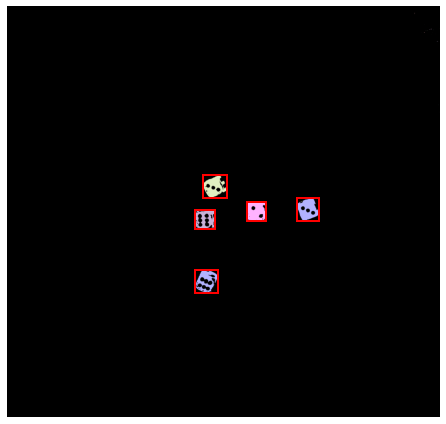

image 9
area: 18099 dims: 180 189 ratio: 0.794582491878128
area: 18898 dims: 179 175 ratio: 0.8531828442437923
area: 18618 dims: 150 151 ratio: 0.8749882507754488
area: 14671 dims: 149 164 ratio: 0.6589265663597574
area: 15169 dims: 183 179 ratio: 0.6676790351688014


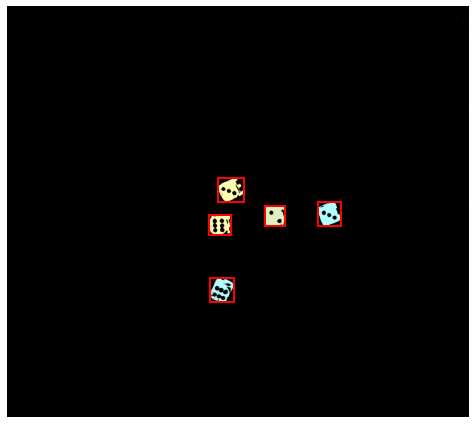

['test 0: 5', 'test 1: 5', 'test 2: 5', 'test 3: 5', 'test 4: 5', 'test 5: 5', 'test 6: 5', 'test 7: 5', 'test 8: 5']


In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.color import label2rgb

counts = []
dice = []
for i in range(1, 10):
  img = skio.imread("dices" + str(i) + ".jpg")
  mask = dice_mask(img)

  label_image = label(mask)
  image_label_overlay = label2rgb(label_image, image=mask, bg_label=0)

  fig, ax = plt.subplots(figsize=(10, 6))
  ax.imshow(image_label_overlay)

  count = 0
  print('image', i)
  die_regions = []
  for region in regionprops(label_image):
      # take regions with large enough areas
      minr, minc, maxr, maxc = region.bbox
      w, h = maxr - minr, maxc - minc
      if region.area >= 1000 and region.solidity > 0.45 and w / h > 0.8 and w / h < 1.2:
          # draw rectangle around segmented dices
          die_regions.append(region.bbox)
          print('area:', region.area, 'dims:', w, h, 'ratio:', region.solidity)
          rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                    fill=False, edgecolor='red', linewidth=2)
          ax.add_patch(rect)
          count += 1
  dice.append(die_regions)
  counts.append(count)
  
  ax.set_axis_off()
  plt.tight_layout()
  plt.show()
print(['test ' + str(i) + ': ' + str(c) for i, c in enumerate(counts)])

(346, 264, 392, 320)
(981, 1080, 3)


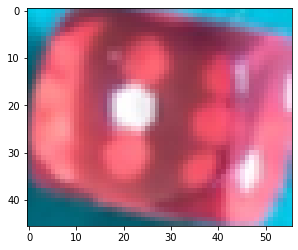

(437, 329, 482, 384)
(981, 1080, 3)


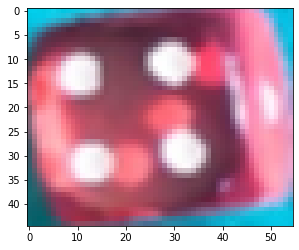

(485, 308, 540, 370)
(981, 1080, 3)


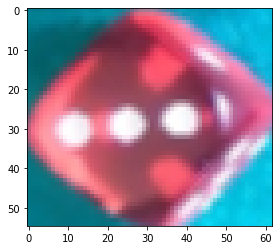

(491, 470, 540, 526)
(981, 1080, 3)


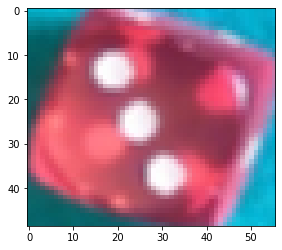

(602, 403, 652, 460)
(981, 1080, 3)


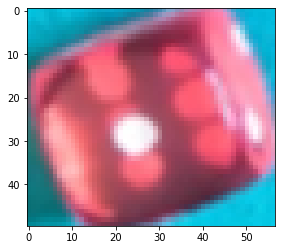

(1108, 723, 1255, 889)
(3136, 3147, 3)


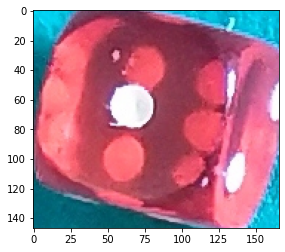

(1394, 905, 1536, 1066)
(3136, 3147, 3)


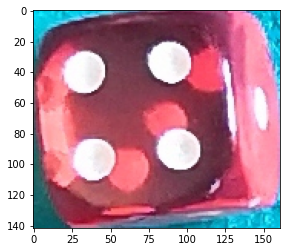

(1545, 838, 1720, 1025)
(3136, 3147, 3)


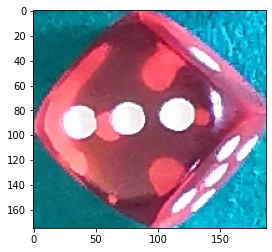

(1572, 1316, 1729, 1484)
(3136, 3147, 3)


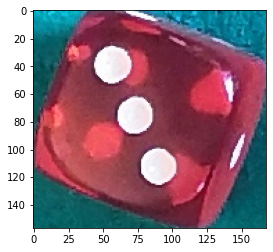

(1913, 1113, 2073, 1280)
(3136, 3147, 3)


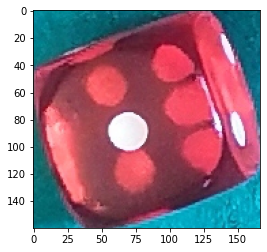

(318, 445, 369, 502)
(1023, 1116, 3)


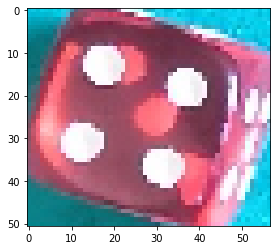

(383, 493, 436, 553)
(1023, 1116, 3)


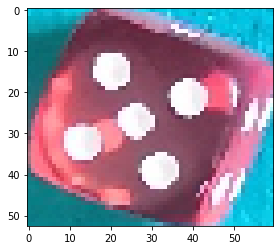

(470, 271, 523, 336)
(1023, 1116, 3)


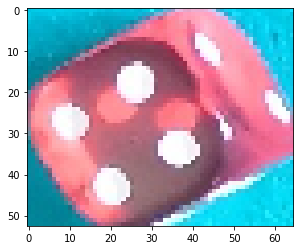

(637, 523, 695, 585)
(1023, 1116, 3)


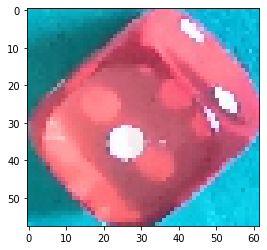

(712, 372, 769, 434)
(1023, 1116, 3)


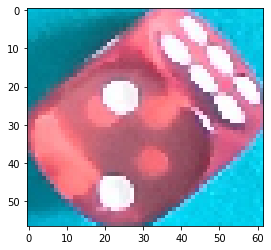

(527, 845, 697, 1022)
(2504, 2561, 3)


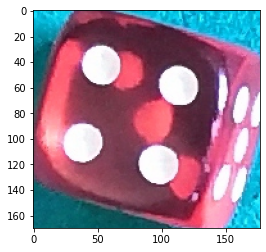

(745, 999, 916, 1188)
(2504, 2561, 3)


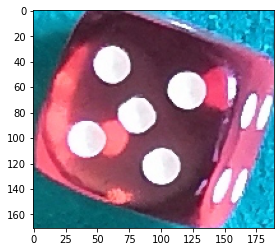

(1046, 320, 1222, 524)
(2504, 2561, 3)


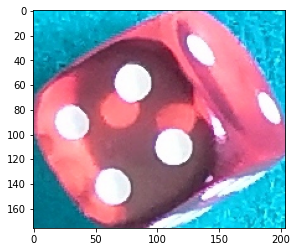

(1580, 1116, 1774, 1312)
(2504, 2561, 3)


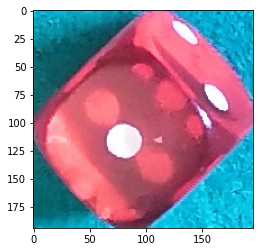

(1837, 653, 2025, 848)
(2504, 2561, 3)


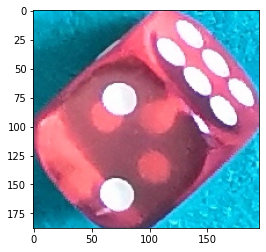

(1051, 1211, 1241, 1414)
(2855, 2817, 3)


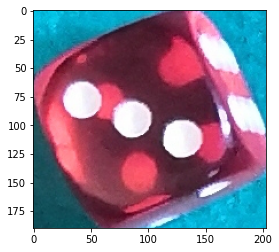

(1263, 2008, 1449, 2197)
(2855, 2817, 3)


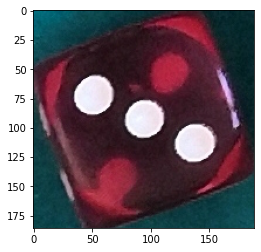

(1283, 1579, 1440, 1741)
(2855, 2817, 3)


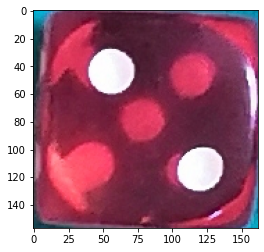

(1349, 1131, 1503, 1313)
(2855, 2817, 3)


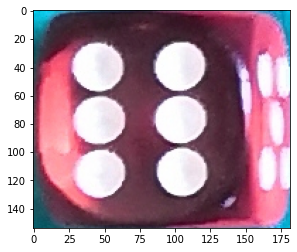

(1873, 1120, 2064, 1318)
(2855, 2817, 3)


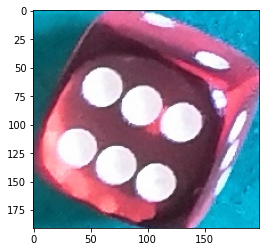

(766, 1688, 936, 1873)
(2565, 2628, 3)


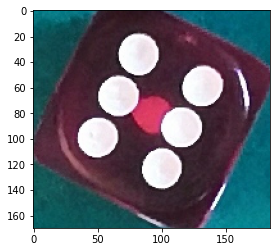

(992, 2190, 1179, 2383)
(2565, 2628, 3)


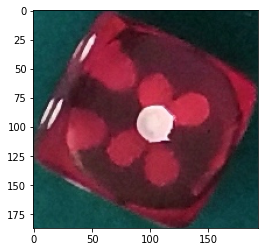

(1298, 2257, 1492, 2454)
(2565, 2628, 3)


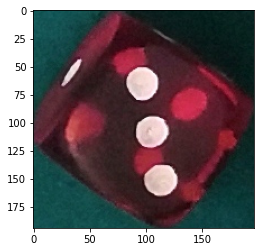

(1405, 1905, 1570, 2069)
(2565, 2628, 3)


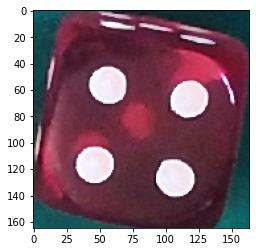

(1413, 1639, 1584, 1811)
(2565, 2628, 3)


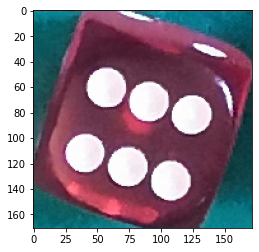

(741, 1596, 954, 1778)
(2835, 2984, 3)


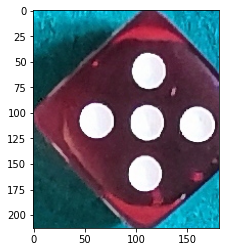

(1415, 2000, 1606, 2189)
(2835, 2984, 3)


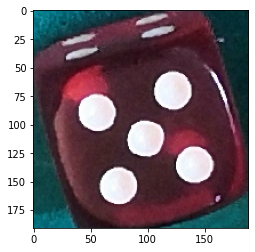

(1701, 1276, 1915, 1485)
(2835, 2984, 3)


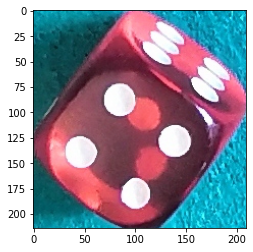

(2299, 1898, 2512, 2098)
(2835, 2984, 3)


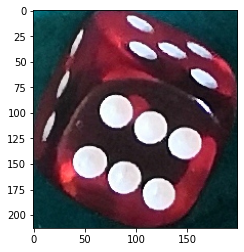

(2352, 1379, 2550, 1547)
(2835, 2984, 3)


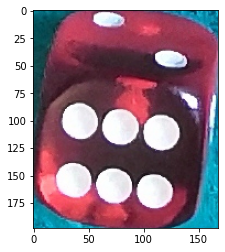

(1338, 1552, 1518, 1741)
(3254, 3428, 3)


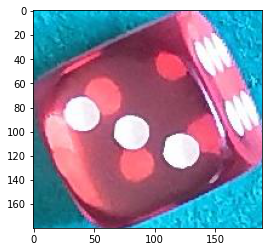

(1520, 2295, 1699, 2469)
(3254, 3428, 3)


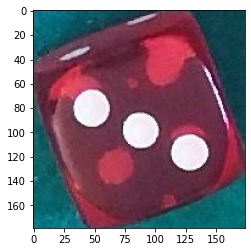

(1550, 1898, 1700, 2048)
(3254, 3428, 3)


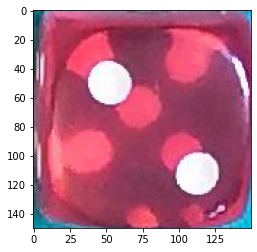

(1614, 1486, 1764, 1650)
(3254, 3428, 3)


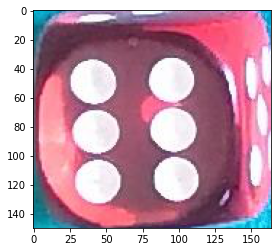

(2087, 1491, 2270, 1670)
(3254, 3428, 3)


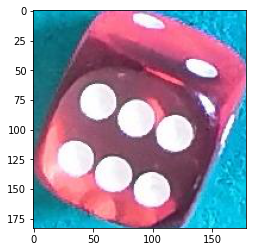

(1282, 1579, 1462, 1768)
(3069, 3454, 3)


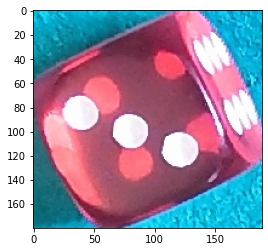

(1462, 2320, 1641, 2495)
(3069, 3454, 3)


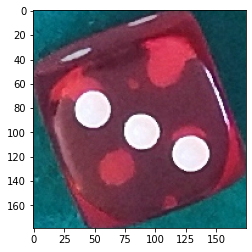

(1493, 1924, 1643, 2075)
(3069, 3454, 3)


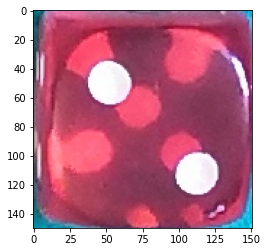

(1558, 1512, 1707, 1676)
(3069, 3454, 3)


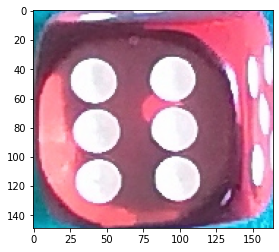

(2030, 1517, 2213, 1696)
(3069, 3454, 3)


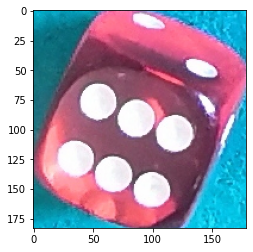

In [52]:
for img, (i, die) in zip(imgs, enumerate(dice)):
  for j, region in enumerate(die):
    print(region)
    minr, minc, maxr, maxc = region
    print(img.shape)
    img_die = img[minr:maxr, minc:maxc]
    plt.imshow(img_die)
    plt.show()
    cv2.imwrite('results/dice_' + str(i) + '_' + str(j) + '.png', img_die)